In [4]:
%matplotlib inline

In [5]:
from matplotlib import pyplot as plt
import numpy as np

In [16]:
data = [[3,1.5,1],
       [2,1,0],
       [4,1.5,1],
       [3,1,0],
       [3.5,.5,1],
       [2,.5,0],
       [5.5,1,1],
       [1,1,0]]

mystery_flower = [3, 1]

In [7]:
data[1]

[2, 1, 0]

In [8]:
data[1][0]

2

In [9]:
#network arch

#   o  flowwr type
#  /\  weights,bias
# o  o width,length


In [10]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))
#derivative of sigmoid
def sigmoid_p(x):
    return sigmoid(x) * (1-sigmoid(x))

In [11]:
t = np.linspace(-5,5,100)
y = sigmoid(t)
y

array([0.00669285, 0.00739896, 0.00817894, 0.00904041, 0.00999169,
       0.01104196, 0.01220126, 0.01348063, 0.01489212, 0.01644893,
       0.01816549, 0.02005754, 0.0221422 , 0.02443814, 0.02696557,
       0.02974643, 0.03280439, 0.036165  , 0.0398557 , 0.04390588,
       0.04834692, 0.05321217, 0.0585369 , 0.06435824, 0.07071501,
       0.07764755, 0.0851974 , 0.093407  , 0.1023192 , 0.11197671,
       0.12242144, 0.13369374, 0.14583148, 0.1588691 , 0.17283646,
       0.18775769, 0.20364993, 0.22052213, 0.23837374, 0.25719365,
       0.2769591 , 0.29763488, 0.31917283, 0.34151151, 0.36457644,
       0.38828059, 0.41252537, 0.43720205, 0.46219351, 0.48737642,
       0.51262358, 0.53780649, 0.56279795, 0.58747463, 0.61171941,
       0.63542356, 0.65848849, 0.68082717, 0.70236512, 0.7230409 ,
       0.74280635, 0.76162626, 0.77947787, 0.79635007, 0.81224231,
       0.82716354, 0.8411309 , 0.85416852, 0.86630626, 0.87757856,
       0.88802329, 0.8976808 , 0.906593  , 0.9148026 , 0.92235

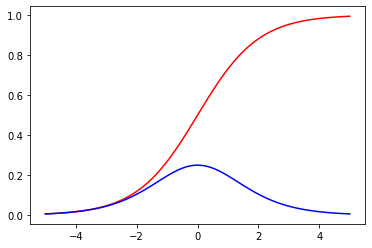

In [12]:
plt.plot(t,y,c='r') #sigmoid func
plt.plot(t,sigmoid_p(t),c='b')

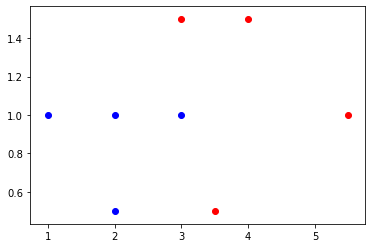

In [13]:
#scatter

for i in range(len(data)):
    point = data[i]
    color = 'r'
    if point[2] == 0:
        color = 'b'
    plt.scatter(point[0],point[1],c=color)
        

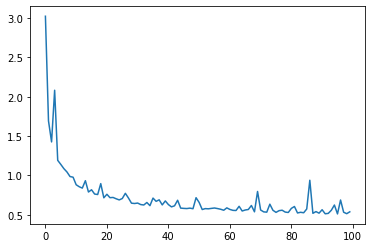

In [14]:
def train():
    #random init of weights
    w1 = np.random.randn()
    w2 = np.random.randn()
    b = np.random.randn()
    
    iterations = 10000
    learning_rate = 0.1
    costs = [] # keep costs during training, see if they go down
    
    for i in range(iterations):
        # get a random point
        ri = np.random.randint(len(data))
        point = data[ri]
        
        z = point[0] * w1 + point[1] * w2 + b
        pred = sigmoid(z) # networks prediction
        
        target = point[2]
        
        # cost for current random point
        cost = np.square(pred - target)
        
        # print the cost over all data points every 1k iters
        if i % 100 == 0:
            c = 0
            for j in range(len(data)):
                p = data[j]
                p_pred = sigmoid(w1 * p[0] + w2 * p[1] + b)
                c += np.square(p_pred - p[2])
            costs.append(c)
        
        dcost_dpred = 2 * (pred - target)
        dpred_dz = sigmoid_p(z)
        
        dz_dw1 = point[0]
        dz_dw2 = point[1]
        dz_db = 1
        
        dcost_dz = dcost_dpred * dpred_dz
        
        dcost_dw1 = dcost_dz * dz_dw1
        dcost_dw2 = dcost_dz * dz_dw2
        dcost_db = dcost_dz * dz_db
        
        w1 = w1 - learning_rate * dcost_dw1
        w2 = w2 - learning_rate * dcost_dw2
        b = b - learning_rate * dcost_db
        
    return costs, w1, w2, b

costs, w1, w2, b = train()

fig = plt.plot(costs)

In [17]:

# predict what the myster flower is!

z = w1 * mystery_flower[0] + w2 * mystery_flower[1] + b
pred = sigmoid(z)

print(pred)
print("close to 0 -> blue, close to 1 -> red")

0.6428856654499867
close to 0 -> blue, close to 1 -> red
